# Flat Price Prediction In Baramati 

#### importing libraries 

In [1]:
import numpy as np
import pandas as pd
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

In [2]:
data=pd.read_excel(r"F:\Flat Project\Final DATA.xlsx")
data

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,Job,450000,4,1,Friend,Builtup,Near TC College,1,722,Children Play ground,...,1,2023,3,1,2,No,Yes,One day later,By cash,2000000
1,Treding,1000000,4,3,Friend,Superbuiltup,Near TC College,2,1800,"Garden, Children Play ground",...,2,2010,4,2,1,No,Yes,Everyday,By cash,2500000
2,Job,200000,4,2,Dealer,Builtup,Near TC College,2,650,Children Play ground,...,1,2005,3,2,3,No,Yes,Everyday,By cash,500000
3,Job,350000,4,1,Advertisement,Builtup,Near TC College,1,400,No,...,1,2021,3,3,1,No,Yes,Everyday,By cash,2000000
4,Job,100000,5,1,Dealer,Builtup,Near TC College,3,1200,Garden,...,2,2023,4,3,1,No,Yes,Everyday,By cash,2400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Job,1200000,4,2,Friend,Superbuiltup,SAHYOG SOCIETY,2,900,"Auditoriam , Garden, Children Play ground",...,2,2021,5,4,2,Yes,Yes,Everyday,By EMI,3500000
305,Teacher,1000000,5,1,Friend,Superbuiltup,SAHYOG SOCIETY,2,1000,"Garden, Children Play ground",...,2,2018,4,2,2,No,Yes,Everyday,By EMI,3200000
306,BUSINESS,1400000,4,1,Dealer,Superbuiltup,SAHYOG SOCIETY,3,1300,"Auditoriam, Children Play ground",...,3,2020,5,4,2,Yes,Yes,Everyday,By EMI,5000000
307,BUSINESS,1600000,6,2,Dealer,Superbuiltup,SAHYOG SOCIETY,2,950,"Auditoriam, Children Play ground",...,2,2022,4,4,2,Yes,Yes,Everyday,By EMI,4000000


In [3]:
data.head(2)

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,Job,450000,4,1,Friend,Builtup,Near TC College,1,722,Children Play ground,...,1,2023,3,1,2,No,Yes,One day later,By cash,2000000
1,Treding,1000000,4,3,Friend,Superbuiltup,Near TC College,2,1800,"Garden, Children Play ground",...,2,2010,4,2,1,No,Yes,Everyday,By cash,2500000


In [4]:
data.shape

(309, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Profession                 309 non-null    object
 1   Annual_Income              309 non-null    int64 
 2   Family_member              309 non-null    int64 
 3   Family_earners             309 non-null    int64 
 4   source_of_flat             309 non-null    object
 5   Area                       309 non-null    object
 6   Location                   309 non-null    object
 7   Type_of_flat               309 non-null    int64 
 8   Area_in_sqft               309 non-null    int64 
 9   Amenities                  309 non-null    object
 10  Availability_of_resources  309 non-null    object
 11  Bathrooms                  309 non-null    int64 
 12  Availability_of_flat       309 non-null    int64 
 13  No_floors_in_building      309 non-null    int64 
 14  Floor_no  

In [6]:
data.describe()

,Annual_Income,Family_member,Family_earners,Type_of_flat,Area_in_sqft,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Price
count,3.090000e+02,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,3.090000e+02
mean,7.278252e+05,4.294498,1.517799,1.508091,759.482201,1.414239,2011.349515,3.563107,1.974110,1.359223,2.484508e+06
std,4.009109e+05,1.360625,0.637446,0.622181,303.272161,0.572581,103.395035,0.772959,0.935922,0.695828,2.111117e+06
min,4.800000e+04,2.000000,0.000000,0.000000,360.000000,1.000000,202.000000,1.000000,0.000000,0.000000,2.000000e+05
25%,4.500000e+05,4.000000,1.000000,1.000000,550.000000,1.000000,2015.000000,3.000000,1.000000,1.000000,1.800000e+06
50%,7.000000e+05,4.000000,1.000000,1.000000,700.000000,1.000000,2018.000000,4.000000,2.000000,1.000000,2.300000e+06
75%,1.000000e+06,5.000000,2.000000,2.000000,950.000000,2.000000,2021.000000,4.000000,3.000000,2.000000,2.900000e+06
max,2.000000e+06,14.000000,4.000000,4.000000,2500.000000,4.000000,2029.000000,7.000000,4.000000,4.000000,3.500000e+07


In [7]:
data.isnull().sum() # for checking the missing values

Profession                   0
Annual_Income                0
Family_member                0
Family_earners               0
source_of_flat               0
Area                         0
Location                     0
Type_of_flat                 0
Area_in_sqft                 0
Amenities                    0
Availability_of_resources    0
Bathrooms                    0
Availability_of_flat         0
No_floors_in_building        0
Floor_no                     0
Balcony                      0
Lift                         0
Parking                      0
Water_supply                 0
Buying_of_Flat               0
Price                        0
dtype: int64

#### here we see in the above there is no missing value

# Dtype Conversion

In [8]:
data.dtypes

Profession                   object
Annual_Income                 int64
Family_member                 int64
Family_earners                int64
source_of_flat               object
Area                         object
Location                     object
Type_of_flat                  int64
Area_in_sqft                  int64
Amenities                    object
Availability_of_resources    object
Bathrooms                     int64
Availability_of_flat          int64
No_floors_in_building         int64
Floor_no                      int64
Balcony                       int64
Lift                         object
Parking                      object
Water_supply                 object
Buying_of_Flat               object
Price                         int64
dtype: object

# LabelEncoder

#### Here we use LabelEncoder method for data type conversion. type of data being used to represent numerical value in dataset

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
data.Area=le.fit_transform(data.Area)
data.Area.value_counts()

0    265
1     44
Name: Area, dtype: int64

In [11]:
data.source_of_flat=le.fit_transform(data.source_of_flat)
data.source_of_flat.value_counts()

1    145
2    133
0     31
Name: source_of_flat, dtype: int64

In [12]:
data.Profession=le.fit_transform(data.Profession)
data.Profession.value_counts()

5     127
0      67
9      44
4      19
3      17
8      13
6       6
1       5
10      4
7       4
2       3
Name: Profession, dtype: int64

In [13]:
data.Water_supply=le.fit_transform(data.Water_supply)
data.Water_supply.value_counts()

0    257
1     25
2     24
3      3
Name: Water_supply, dtype: int64

In [14]:
data.Buying_of_Flat=le.fit_transform(data.Buying_of_Flat)
data.Buying_of_Flat.value_counts()

0    258
1     51
Name: Buying_of_Flat, dtype: int64

In [15]:
data.Parking=le.fit_transform(data.Parking)
data.Parking.value_counts()

1    297
0     12
Name: Parking, dtype: int64

In [16]:
data.Lift =le.fit_transform(data.Lift)
data.Lift.value_counts()

1    160
0    149
Name: Lift, dtype: int64

In [17]:
data.Location=le.fit_transform(data.Location)
data.Location.value_counts()

17    23
11    21
13    20
0     19
4     18
19    17
2     16
12    12
16    12
25    12
5     11
18    11
14    11
15    10
7     10
24    10
8     10
27     9
22     9
21     9
6      8
1      7
3      7
10     5
26     5
20     4
23     1
9      1
28     1
Name: Location, dtype: int64

In [18]:
data.Amenities=le.fit_transform(data.Amenities)
data.Amenities.value_counts()

7     126
2      81
3      35
4      32
9      12
0       9
5       5
6       3
1       3
8       2
10      1
Name: Amenities, dtype: int64

In [19]:
data.Availability_of_resources=le.fit_transform(data.Availability_of_resources)
data.Availability_of_resources.value_counts()

6     142
4      70
8      28
2      16
7      13
10     10
3       8
9       7
11      6
1       5
5       3
0       1
Name: Availability_of_resources, dtype: int64

In [20]:
data.dtypes

Profession                   int32
Annual_Income                int64
Family_member                int64
Family_earners               int64
source_of_flat               int32
Area                         int32
Location                     int32
Type_of_flat                 int64
Area_in_sqft                 int64
Amenities                    int32
Availability_of_resources    int32
Bathrooms                    int64
Availability_of_flat         int64
No_floors_in_building        int64
Floor_no                     int64
Balcony                      int64
Lift                         int32
Parking                      int32
Water_supply                 int32
Buying_of_Flat               int32
Price                        int64
dtype: object

now we get the numerical column 

In [21]:
######## PPS ###############

In [22]:
######## PPS MATRIX ###############

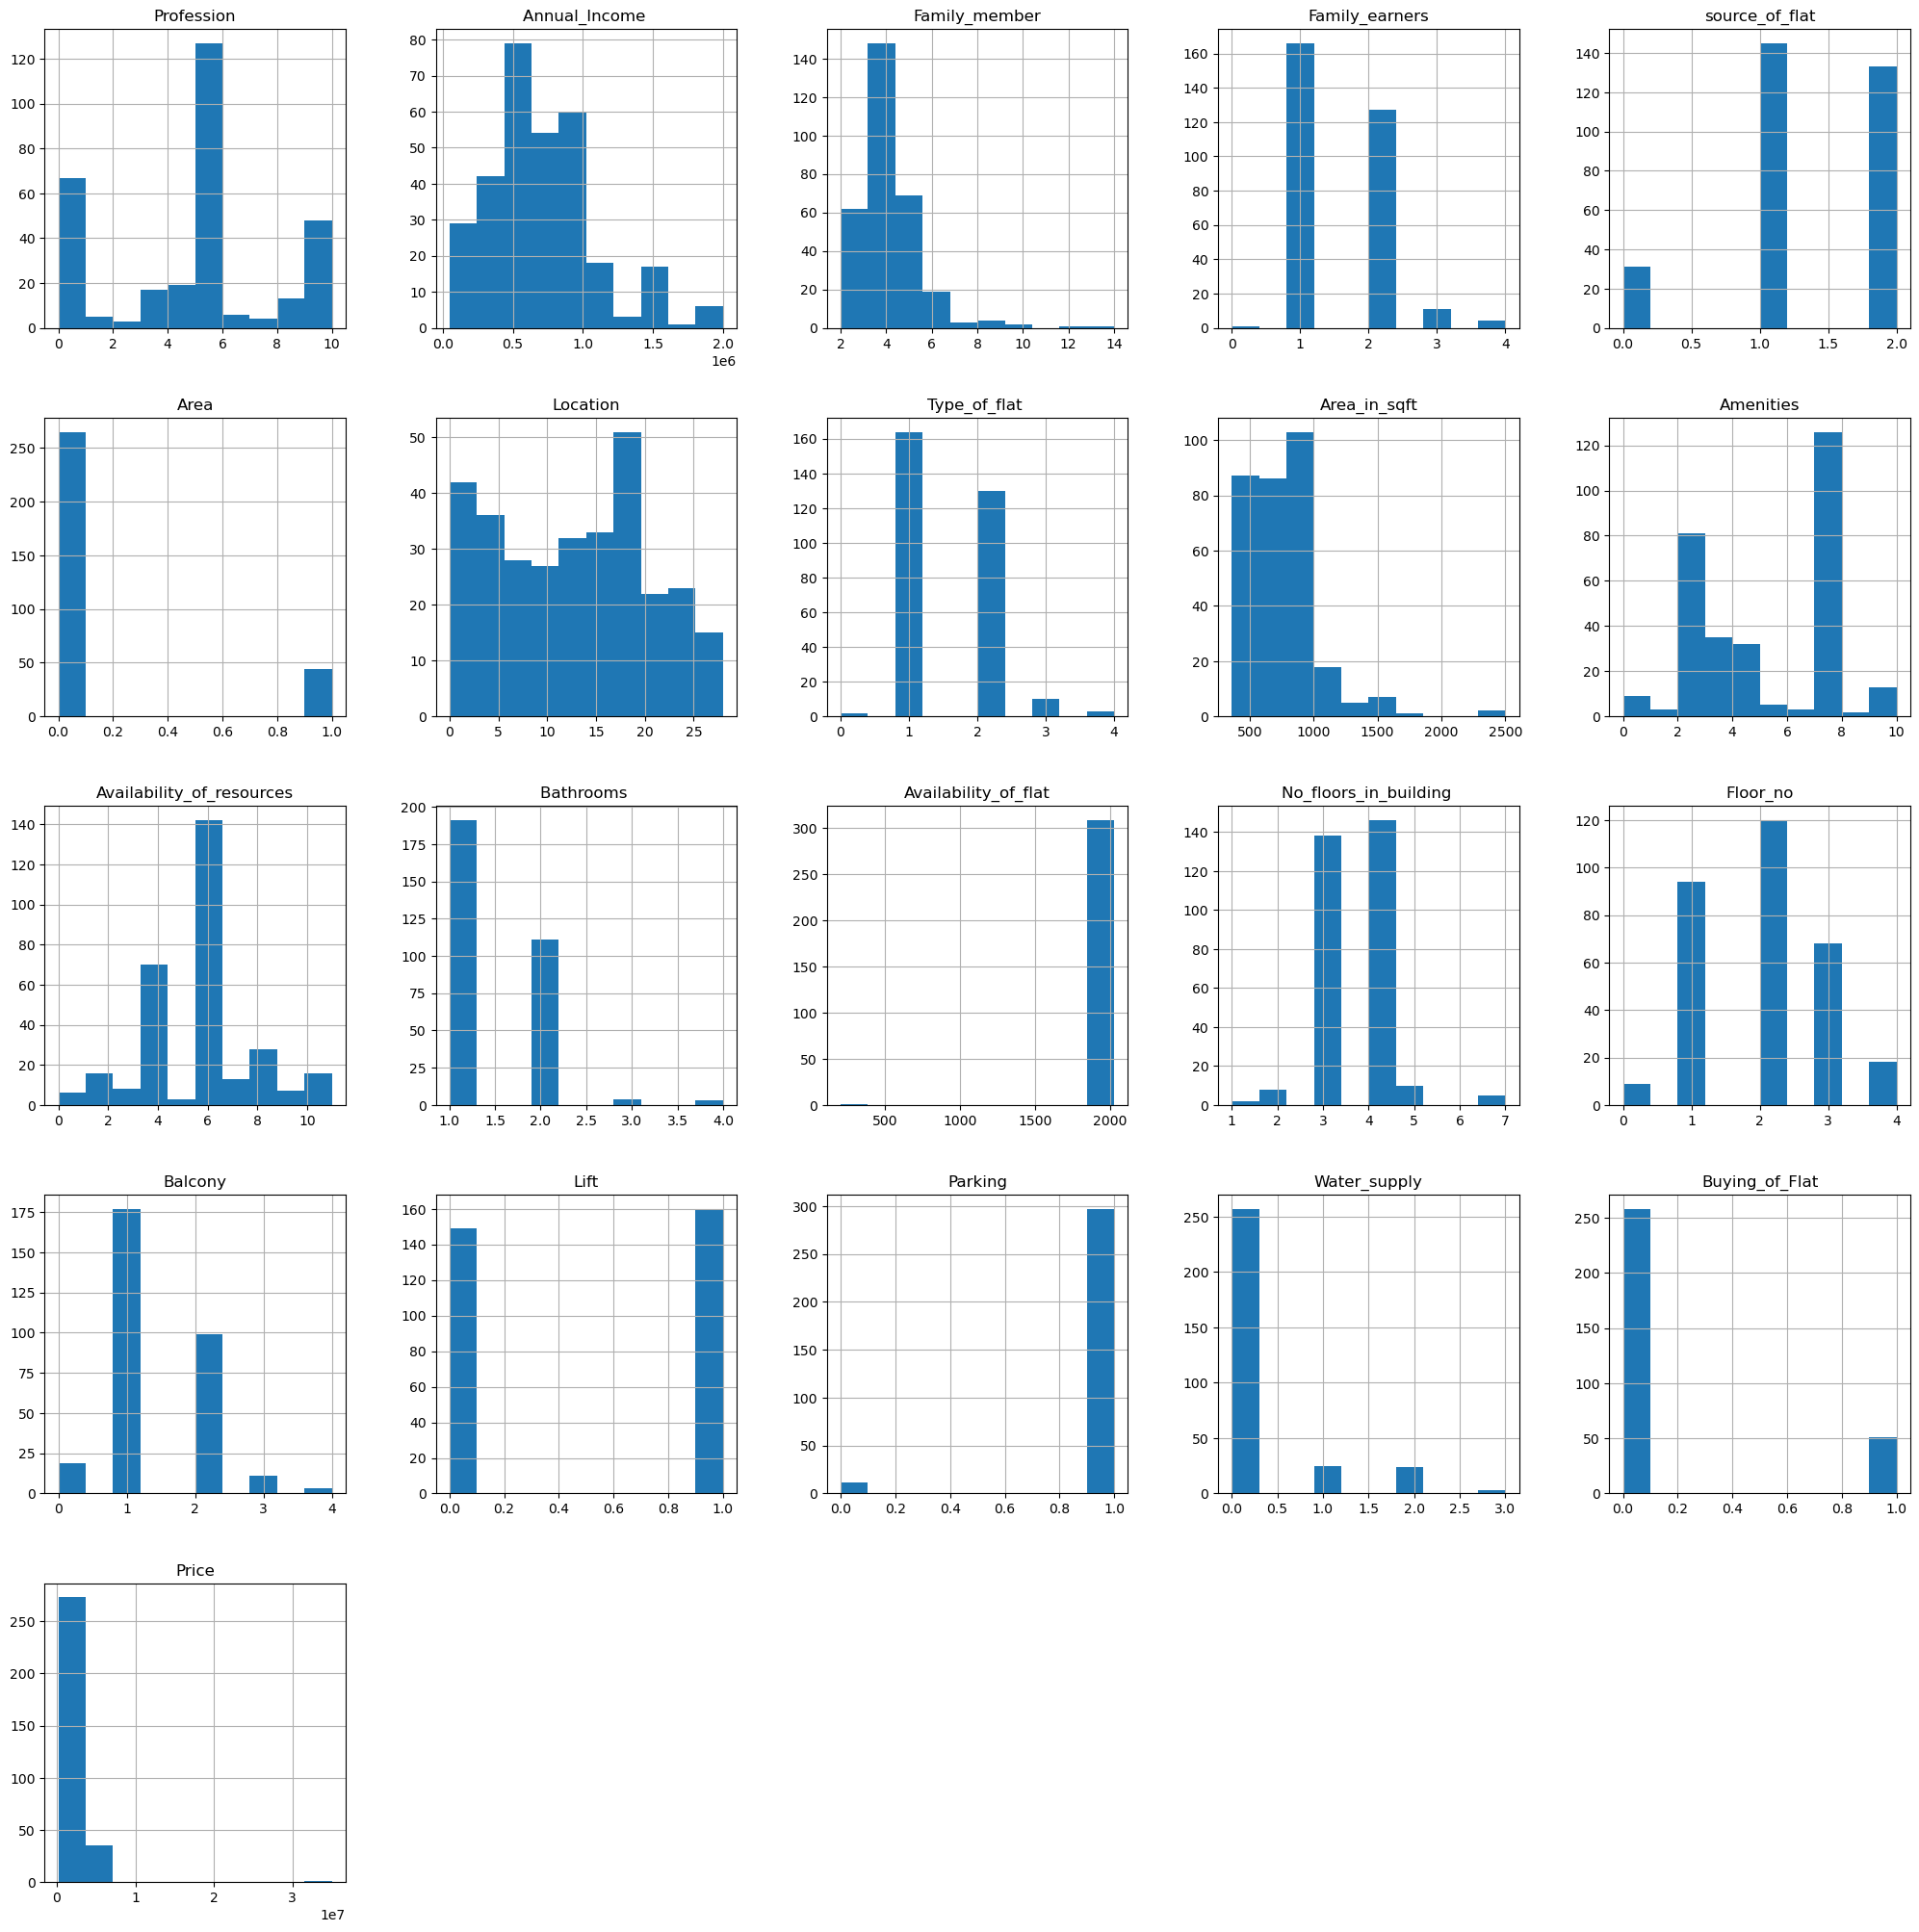

In [23]:
data.hist(figsize=(25,25)) 
plt.show()

# Skewness Treatment 

In [24]:
data.skew()

Profession                   -0.091957
Annual_Income                 0.820238
Family_member                 2.630147
Family_earners                1.068495
source_of_flat               -0.453267
Area                          2.056644
Location                      0.029576
Type_of_flat                  0.905410
Area_in_sqft                  1.684289
Amenities                    -0.050548
Availability_of_resources     0.165561
Bathrooms                     1.332607
Availability_of_flat        -17.511707
No_floors_in_building         1.103595
Floor_no                      0.266911
Balcony                       0.717473
Lift                         -0.071591
Parking                      -4.797249
Water_supply                  2.387697
Buying_of_Flat                1.813392
Price                        11.973157
dtype: float64

<AxesSubplot:xlabel='Profession', ylabel='Density'>

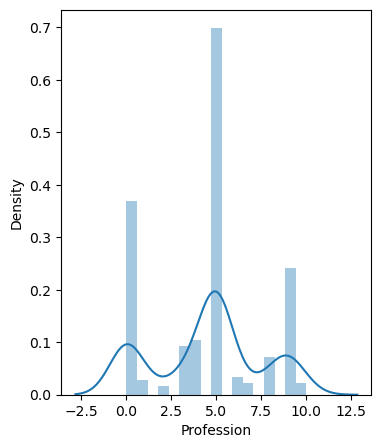

In [25]:
fig=plt.figure(figsize=(4,5))
sns.distplot(data.Profession)

In [26]:
data.loc[data["Profession"]==0]

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
5,0,300000,4,2,2,0,12,2,750,3,...,2,2017,4,2,1,1,1,0,0,2500000
21,0,1000000,4,1,2,0,2,2,1200,2,...,2,2012,4,2,2,0,1,0,0,3500000
30,0,500000,6,1,2,0,17,4,1500,7,...,1,2015,3,0,0,0,1,0,1,1700000
32,0,1200000,6,3,2,0,17,1,750,7,...,1,2022,3,2,1,0,1,0,0,2250000
33,0,800000,4,2,1,0,17,1,750,7,...,1,2015,3,2,2,0,1,0,0,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0,900000,5,2,1,0,11,2,1200,0,...,2,2021,4,3,2,0,1,0,1,3900000
299,0,1200000,4,1,1,1,15,2,1000,4,...,2,2020,4,2,2,1,1,0,0,3800000
303,0,1500000,6,2,2,1,15,3,1500,4,...,3,2020,5,3,3,1,1,0,1,5500000
306,0,1400000,4,1,1,1,15,3,1300,1,...,3,2020,5,4,2,1,1,0,0,5000000


In [27]:
#data.Profession.skew()

In [28]:
#v2=np.sqrt(data.Profession)

In [29]:
#v2.skew()

In [30]:
data.loc[data["Family_member"]==0]

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price


In [31]:
data.Family_member.skew()

2.630147423033079

In [32]:
v1=np.log(data.Family_member)

In [33]:
v1.skew()

0.290584978650301

In [34]:

data

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,5,450000,4,1,2,0,12,1,722,2,...,1,2023,3,1,2,0,1,1,1,2000000
1,10,1000000,4,3,2,1,12,2,1800,4,...,2,2010,4,2,1,0,1,0,1,2500000
2,5,200000,4,2,1,0,12,2,650,2,...,1,2005,3,2,3,0,1,0,1,500000
3,5,350000,4,1,0,0,12,1,400,7,...,1,2021,3,3,1,0,1,0,1,2000000
4,5,100000,5,1,1,0,12,3,1200,3,...,2,2023,4,3,1,0,1,0,1,2400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,5,1200000,4,2,2,1,15,2,900,0,...,2,2021,5,4,2,1,1,0,0,3500000
305,9,1000000,5,1,2,1,15,2,1000,4,...,2,2018,4,2,2,0,1,0,0,3200000
306,0,1400000,4,1,1,1,15,3,1300,1,...,3,2020,5,4,2,1,1,0,0,5000000
307,0,1600000,6,2,1,1,15,2,950,1,...,2,2022,4,4,2,1,1,0,0,4000000


# Outlier Treatment 

<AxesSubplot:ylabel='Availability_of_resources'>

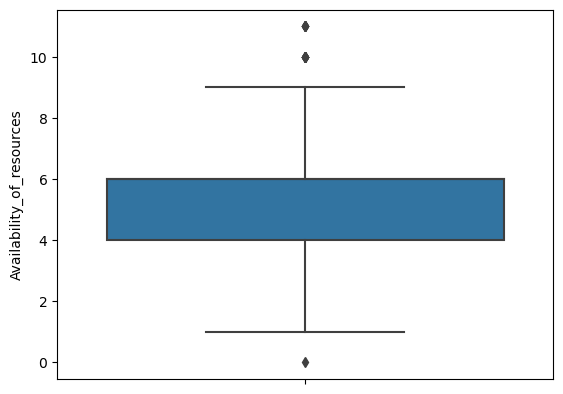

In [35]:
sns.boxplot(data=data,y="Availability_of_resources")

In [36]:
iqr=data.Availability_of_resources.quantile(0.75)-data.Availability_of_resources.quantile(0.25)
iqr

2.0

In [37]:
lb=data["Availability_of_resources"].quantile(0.25)-(iqr*3)
ub=data["Availability_of_resources"].quantile(0.75)+(iqr*3)
print(lb,ub)

-2.0 12.0


In [38]:
data.loc[data["Availability_of_resources"]>19.0,"Availability_of_resources"]=19.0
data.loc[data["Availability_of_resources"]<-2.0,"Availability_of_resources"]=-2.0

<AxesSubplot:ylabel='Profession'>

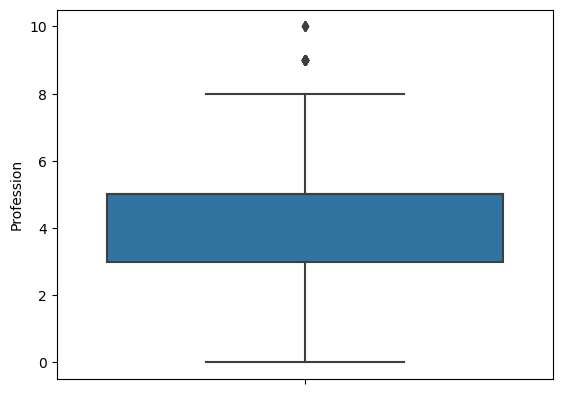

In [39]:
sns.boxplot(data=data,y="Profession")

In [40]:
iqr=data.Profession.quantile(0.75)-data.Profession.quantile(0.25)
iqr

2.0

In [41]:
data["Profession"].describe()

count    309.000000
mean       4.456311
std        2.972089
min        0.000000
25%        3.000000
50%        5.000000
75%        5.000000
max       10.000000
Name: Profession, dtype: float64

In [42]:
lb=data["Profession"].quantile(0.25)-(iqr*3)
ub=data["Profession"].quantile(0.75)+(iqr*3)
print(lb,ub)

-3.0 11.0


In [43]:
data.loc[data["Profession"]>18.0,"Profession"]=18.0
data.loc[data["Profession"]<-3.0,"Profession"]=-3.0

In [44]:
data.Family_member.value_counts()

4     148
5      69
3      50
6      19
2      12
7       3
9       3
10      2
12      1
14      1
8       1
Name: Family_member, dtype: int64

In [45]:
data

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,5,450000,4,1,2,0,12,1,722,2,...,1,2023,3,1,2,0,1,1,1,2000000
1,10,1000000,4,3,2,1,12,2,1800,4,...,2,2010,4,2,1,0,1,0,1,2500000
2,5,200000,4,2,1,0,12,2,650,2,...,1,2005,3,2,3,0,1,0,1,500000
3,5,350000,4,1,0,0,12,1,400,7,...,1,2021,3,3,1,0,1,0,1,2000000
4,5,100000,5,1,1,0,12,3,1200,3,...,2,2023,4,3,1,0,1,0,1,2400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,5,1200000,4,2,2,1,15,2,900,0,...,2,2021,5,4,2,1,1,0,0,3500000
305,9,1000000,5,1,2,1,15,2,1000,4,...,2,2018,4,2,2,0,1,0,0,3200000
306,0,1400000,4,1,1,1,15,3,1300,1,...,3,2020,5,4,2,1,1,0,0,5000000
307,0,1600000,6,2,1,1,15,2,950,1,...,2,2022,4,4,2,1,1,0,0,4000000


# Correlation and correlation matrix


In [46]:
x=data.corr()
x

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
Profession,1.000000,-0.229350,-0.241284,-0.010299,0.069620,-0.087630,0.145773,-0.260981,-0.323969,0.066642,...,-0.294591,-0.013326,0.070102,-0.042427,-0.125047,-0.135347,0.030911,-0.039958,-0.197643,-0.050866
Annual_Income,-0.229350,1.000000,0.005249,0.092539,-0.051618,0.184533,-0.087413,0.171182,0.266178,-0.063794,...,0.241482,0.097478,0.035952,0.032255,0.103367,0.193491,-0.113666,-0.120648,-0.058351,0.203954
Family_member,-0.241284,0.005249,1.000000,0.426300,-0.073508,-0.020165,0.039615,0.309749,0.252155,-0.027046,...,0.338834,0.011890,-0.037795,-0.032237,0.199967,-0.033945,0.006584,-0.015464,0.115392,0.124786
Family_earners,-0.010299,0.092539,0.426300,1.000000,-0.014216,0.046810,0.037851,0.136757,0.108323,0.021720,...,0.139852,0.045915,-0.040176,0.076964,-0.010802,-0.079866,-0.099659,0.020211,0.008113,0.010680
source_of_flat,0.069620,-0.051618,-0.073508,-0.014216,1.000000,-0.007476,0.050090,-0.022664,-0.060897,-0.128822,...,-0.054502,0.031298,0.010093,0.104742,-0.047634,-0.018105,-0.026794,-0.078491,-0.078325,-0.044771
Area,-0.087630,0.184533,-0.020165,0.046810,-0.007476,1.000000,-0.245980,0.024510,0.127323,0.016961,...,0.125931,0.032891,0.062682,0.090578,0.109234,0.300554,0.081906,-0.154688,-0.056433,0.097242
Location,0.145773,-0.087413,0.039615,0.037851,0.050090,-0.245980,1.000000,-0.092319,-0.096661,-0.041315,...,-0.137414,0.021074,-0.037103,-0.136976,-0.037755,-0.128036,-0.316392,-0.061276,-0.170028,-0.006120
Type_of_flat,-0.260981,0.171182,0.309749,0.136757,-0.022664,0.024510,-0.092319,1.000000,0.791087,-0.225954,...,0.765228,0.048558,0.172776,0.083995,0.394487,0.215884,0.083516,0.010894,0.183673,0.279954
Area_in_sqft,-0.323969,0.266178,0.252155,0.108323,-0.060897,0.127323,-0.096661,0.791087,1.000000,-0.188972,...,0.732007,0.038369,0.144945,0.099732,0.469530,0.236061,0.104769,-0.008337,0.179330,0.300138
Amenities,0.066642,-0.063794,-0.027046,0.021720,-0.128822,0.016961,-0.041315,-0.225954,-0.188972,1.000000,...,-0.291890,-0.067463,-0.268604,-0.222999,-0.222943,-0.430505,0.058115,0.000722,-0.005201,-0.067368


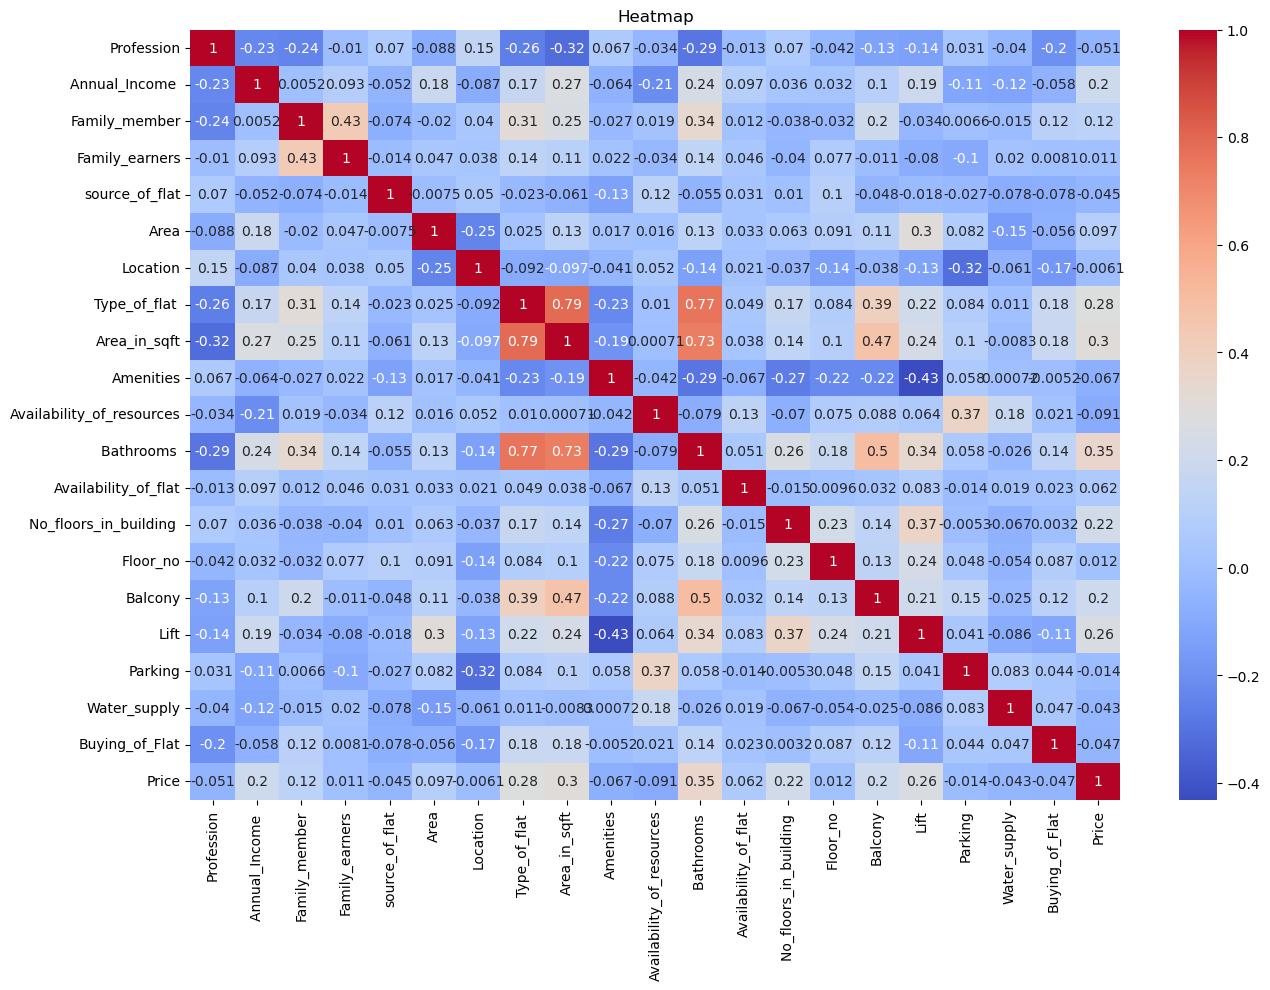

In [47]:
plt.figure(figsize=(15,10))
#heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.title("Heatmap")
plt.show()

### 1.There is highly positive correlation between Area in square feet of flat and type of the flat.


### 2.There is highly positive correlation between Bathrooms and Type of flat.


# Exploratory Data Analysis (EDA)

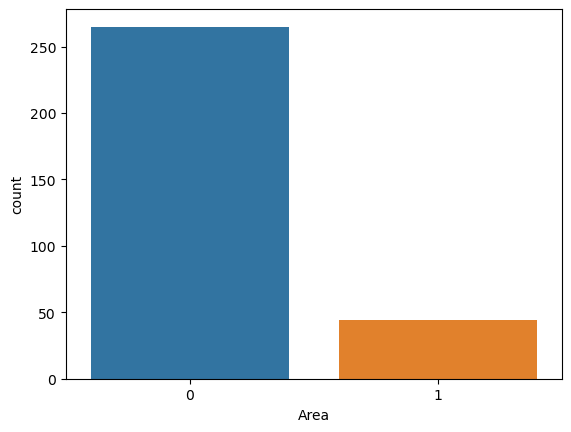

In [48]:
sns.countplot(data["Area"])
plt.show()

### According to this bar plot we conclude that there is high build-up area in Baramati city.

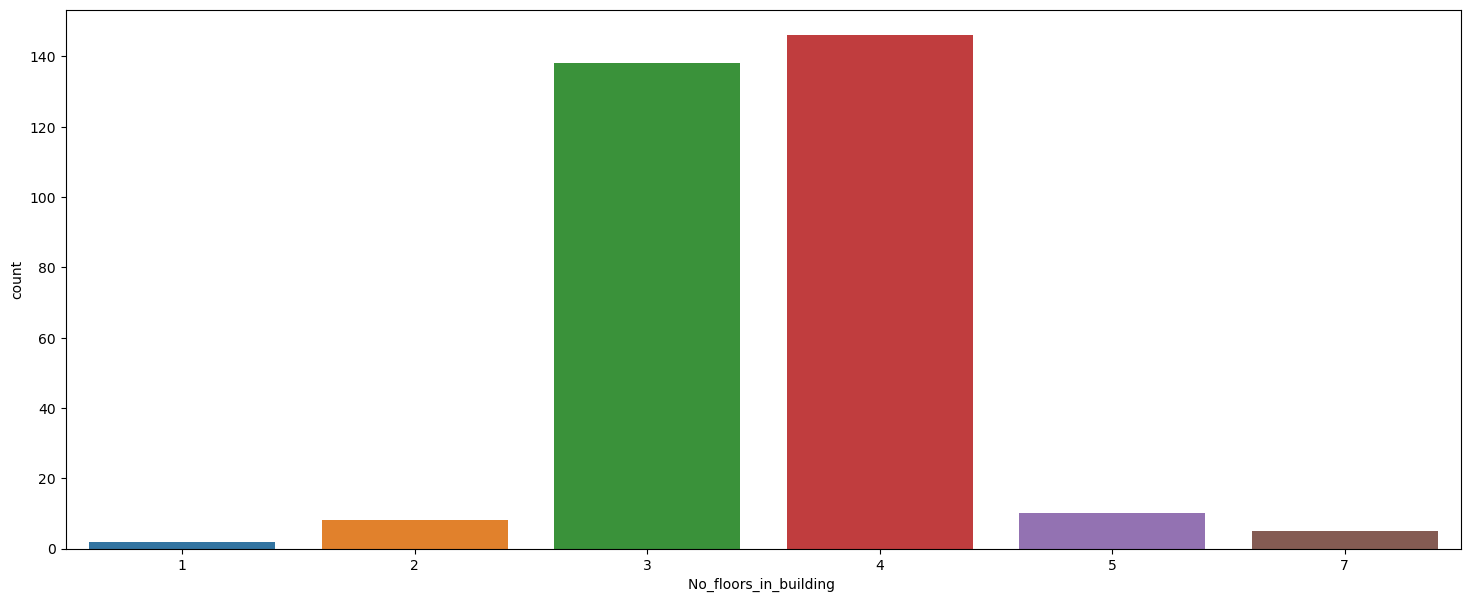

In [49]:
plt.figure(figsize=(18,7))
sns.countplot(data["No_floors_in_building "])
plt.show()


### In Baramati city most buildings have 3 and 4 floors.

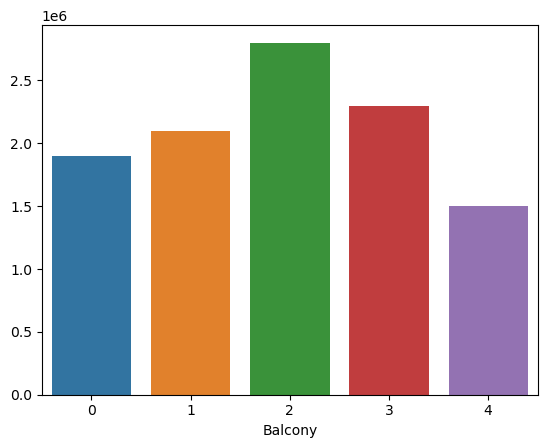

In [50]:
temp = data.groupby("Balcony")["Price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

### According to this bar plot price of flat is higher if there is 2 balcony and lower for 4 balconies.

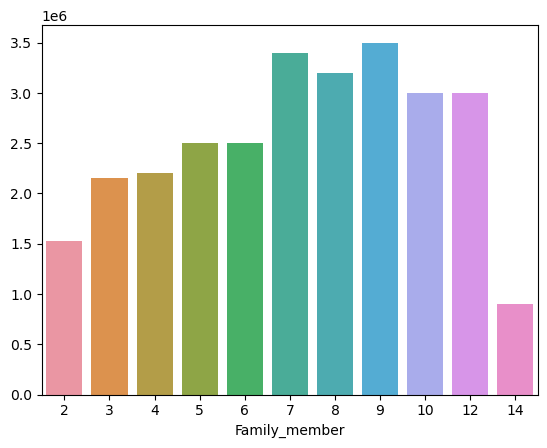

In [51]:
temp=data.groupby("Family_member")["Price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

### According to this graph we see that as the number of members in family increases people buy the flat according to that.

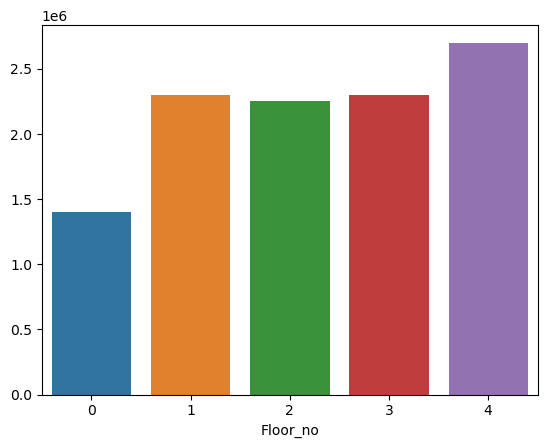

In [52]:
temp=data.groupby("Floor_no")["Price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

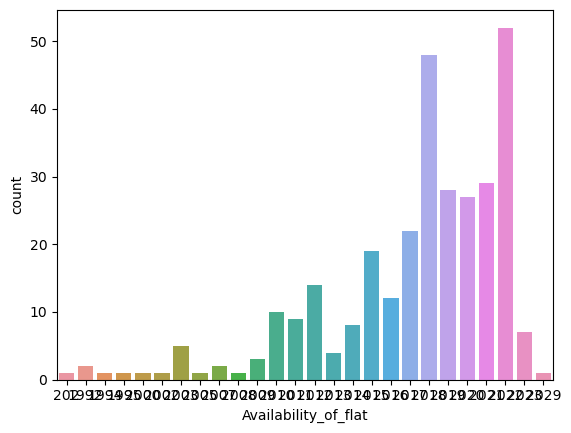

In [53]:
sns.countplot(data["Availability_of_flat"])
plt.show()

### According to this count plot of year we see that maximum flat are sales in the year of 2018 and 2022. In year 2019 to 2021 we see that the impact of covid pandemic in sales of flat.

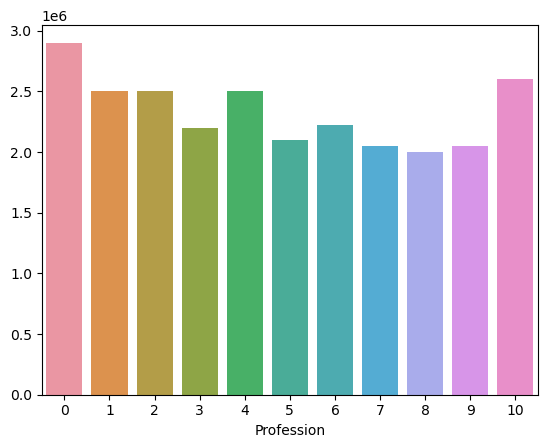

In [54]:
temp=data.groupby("Profession")["Price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

### According to this bar plot we conclude that the people having profession is business and treading buy the expensive flat.

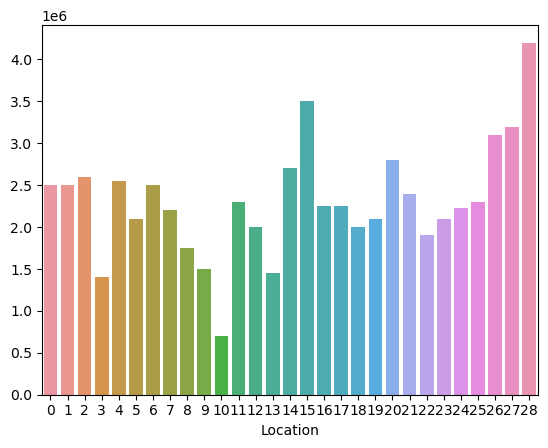

In [55]:
temp=data.groupby("Location")["Price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

## Conclusions: 


### 1.According to this nakshatra garden having more facilities still it has price less in Baramati.


### 2.According to this plot Vidyanagar and Sahyog Society has maximum price in Baramati.

### 3.According to this plot Mukti Nagar kasba has less price in Baramati 


# Natural Language Processing

In [56]:
nlp=pd.read_excel(r"F:\Flat Project\Final DATA.xlsx")
nlp

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,Job,450000,4,1,Friend,Builtup,Near TC College,1,722,Children Play ground,...,1,2023,3,1,2,No,Yes,One day later,By cash,2000000
1,Treding,1000000,4,3,Friend,Superbuiltup,Near TC College,2,1800,"Garden, Children Play ground",...,2,2010,4,2,1,No,Yes,Everyday,By cash,2500000
2,Job,200000,4,2,Dealer,Builtup,Near TC College,2,650,Children Play ground,...,1,2005,3,2,3,No,Yes,Everyday,By cash,500000
3,Job,350000,4,1,Advertisement,Builtup,Near TC College,1,400,No,...,1,2021,3,3,1,No,Yes,Everyday,By cash,2000000
4,Job,100000,5,1,Dealer,Builtup,Near TC College,3,1200,Garden,...,2,2023,4,3,1,No,Yes,Everyday,By cash,2400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Job,1200000,4,2,Friend,Superbuiltup,SAHYOG SOCIETY,2,900,"Auditoriam , Garden, Children Play ground",...,2,2021,5,4,2,Yes,Yes,Everyday,By EMI,3500000
305,Teacher,1000000,5,1,Friend,Superbuiltup,SAHYOG SOCIETY,2,1000,"Garden, Children Play ground",...,2,2018,4,2,2,No,Yes,Everyday,By EMI,3200000
306,BUSINESS,1400000,4,1,Dealer,Superbuiltup,SAHYOG SOCIETY,3,1300,"Auditoriam, Children Play ground",...,3,2020,5,4,2,Yes,Yes,Everyday,By EMI,5000000
307,BUSINESS,1600000,6,2,Dealer,Superbuiltup,SAHYOG SOCIETY,2,950,"Auditoriam, Children Play ground",...,2,2022,4,4,2,Yes,Yes,Everyday,By EMI,4000000


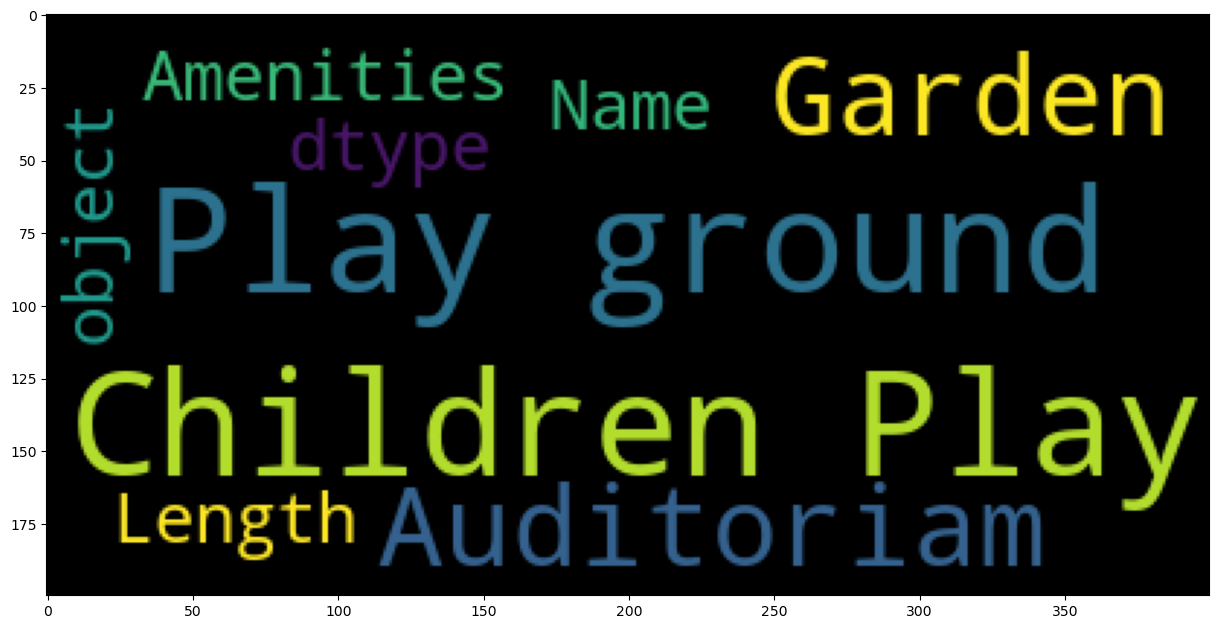

In [57]:
wc=WordCloud(max_words=50)
Cloud=wc.generate(str(nlp.Amenities))
fig=plt.figure(figsize=(15,15)) 
plt.imshow(Cloud)

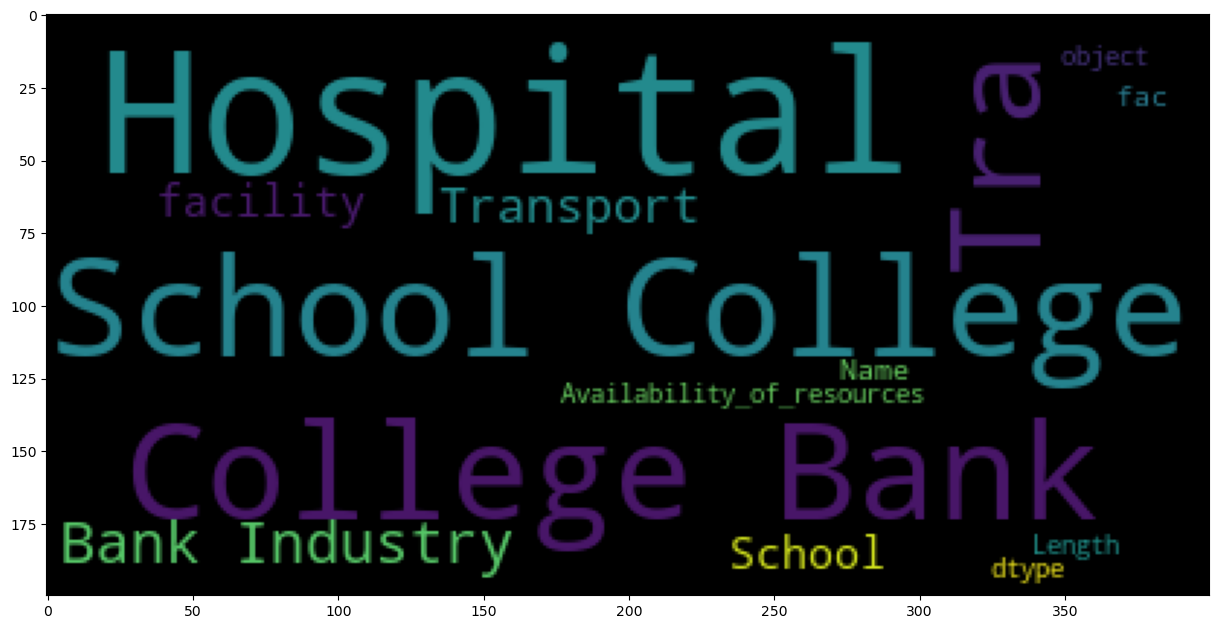

In [58]:
wc=WordCloud(max_words=50)
Cloud=wc.generate(str(nlp.Availability_of_resources))
fig=plt.figure(figsize=(15,15)) 
plt.imshow(Cloud)

# Conclusions

### According to NLP for amenities we see that people buy flat having children play ground is near to flat.

### According to NLP for availability of resourses we see that people buy flat having hospital is near to flat.

# Linear Model

In [59]:
data

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,5,450000,4,1,2,0,12,1,722,2,...,1,2023,3,1,2,0,1,1,1,2000000
1,10,1000000,4,3,2,1,12,2,1800,4,...,2,2010,4,2,1,0,1,0,1,2500000
2,5,200000,4,2,1,0,12,2,650,2,...,1,2005,3,2,3,0,1,0,1,500000
3,5,350000,4,1,0,0,12,1,400,7,...,1,2021,3,3,1,0,1,0,1,2000000
4,5,100000,5,1,1,0,12,3,1200,3,...,2,2023,4,3,1,0,1,0,1,2400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,5,1200000,4,2,2,1,15,2,900,0,...,2,2021,5,4,2,1,1,0,0,3500000
305,9,1000000,5,1,2,1,15,2,1000,4,...,2,2018,4,2,2,0,1,0,0,3200000
306,0,1400000,4,1,1,1,15,3,1300,1,...,3,2020,5,4,2,1,1,0,0,5000000
307,0,1600000,6,2,1,1,15,2,950,1,...,2,2022,4,4,2,1,1,0,0,4000000


### Spliting of data

In [60]:
data_x=data.iloc[:,0:20]
data_y=data.iloc[:,-1]

In [61]:
data_x

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,Availability_of_resources,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat
0,5,450000,4,1,2,0,12,1,722,2,6,1,2023,3,1,2,0,1,1,1
1,10,1000000,4,3,2,1,12,2,1800,4,4,2,2010,4,2,1,0,1,0,1
2,5,200000,4,2,1,0,12,2,650,2,11,1,2005,3,2,3,0,1,0,1
3,5,350000,4,1,0,0,12,1,400,7,11,1,2021,3,3,1,0,1,0,1
4,5,100000,5,1,1,0,12,3,1200,3,11,2,2023,4,3,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,5,1200000,4,2,2,1,15,2,900,0,6,2,2021,5,4,2,1,1,0,0
305,9,1000000,5,1,2,1,15,2,1000,4,6,2,2018,4,2,2,0,1,0,0
306,0,1400000,4,1,1,1,15,3,1300,1,6,3,2020,5,4,2,1,1,0,0
307,0,1600000,6,2,1,1,15,2,950,1,6,2,2022,4,4,2,1,1,0,0


In [62]:
data_y

0      2000000
1      2500000
2       500000
3      2000000
4      2400000
        ...   
304    3500000
305    3200000
306    5000000
307    4000000
308    3500000
Name: Price, Length: 309, dtype: int64

## Multiple Regression

In [63]:
import sklearn
from sklearn.model_selection import train_test_split

In [64]:
b_x_train,b_x_test,b_y_train,b_y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=101)

In [65]:
b_x_train.shape,b_x_test.shape,b_y_train.shape,b_y_test.shape

((247, 20), (62, 20), (247,), (62,))

In [66]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [67]:
lin.fit(b_x_train,b_y_train)

LinearRegression()

In [68]:
lin_p=lin.predict(b_x_test)
lin_p

array([2907523.75470449, 1795865.33160903, 2318674.66532187,
       2165382.98673276, 1499333.47527356, 2478034.58895067,
       3345964.63488011, 1639416.25392989, 3866715.8522834 ,
       1207407.53882008, 1557913.28613627, 2183262.98967251,
       3214301.30021981, 1633506.644928  , 3763289.77126976,
       2289630.78976069, 4403760.29673424, 1817839.50460409,
       2143729.32816056, 2415881.78022479, 1168578.30256964,
       3074883.81780135, 2541489.84456924, 2006654.28606119,
       4134126.05580172, 2297317.42235563, 3136411.08981749,
        675439.5163059 , 2339910.63531   , 2465463.45508525,
       3540526.4382726 , 2427860.28340564, 2175608.27495359,
       3369019.48124543, 3583545.15053272, 1748475.46900404,
       3927178.05262823, 3271937.41020843, 3125260.368385  ,
       2612552.87972409, 1868786.27026091, 1607919.89790725,
       2154418.55150695, 2161657.59873516, 2241253.57950023,
       1416098.63520608, 4369368.2244922 , 1958925.25746279,
       6020384.57839668,

In [69]:
lin.coef_

array([ 7.59761027e+04,  5.77369598e-01,  1.49444871e+05, -2.21236805e+05,
        1.53192526e+04, -4.73697295e+04,  1.06946094e+04,  1.80177986e+04,
        5.51647111e+02,  9.54232814e+04, -6.72414654e+04,  7.75799232e+05,
        8.68871291e+02,  3.46414216e+05, -1.55330876e+05,  1.21090246e+05,
        8.06824322e+05, -1.78772049e+05,  1.02830522e+05, -3.60460042e+05])

In [70]:
lin.intercept_

-3362911.213218422

In [71]:
R2=lin.score(b_x_train,b_y_train)
R2

0.1873262943832914

In [72]:
Adj_R2=1-(((1-R2)*(309-1))/(309-20-1))
Adj_R2

0.13089062038213106

In [73]:
from sklearn import metrics

In [74]:
mse=metrics.mean_squared_error(b_y_test,lin_p)
mse

431057699605.1582

In [75]:
#RMSE,MAPE

rmse=pow(mse,0.5)
rmse

656549.8454840715

In [76]:
df1=pd.DataFrame({"Actual":b_y_test,"Predicted":lin_p})
df1

,Actual,Predicted
273,2500000,2.907524e+06
8,1800000,1.795865e+06
293,2100000,2.318675e+06
130,1750000,2.165383e+06
204,1900000,1.499333e+06
...,...,...
201,2000000,2.009614e+06
206,1400000,2.352488e+06
48,2600000,3.343477e+06
183,2200000,3.074983e+06


### Scatter PLOT

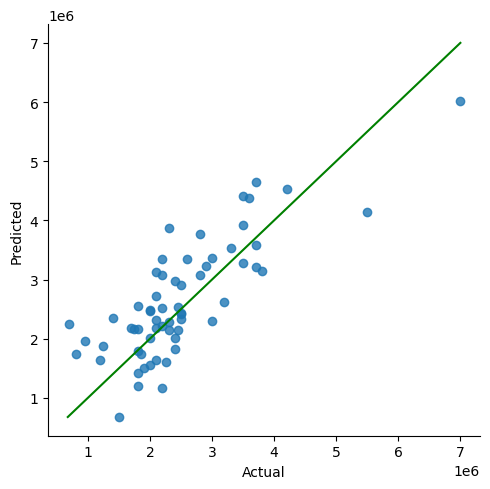

In [77]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Random forest Regressor

In [78]:
x=data.iloc[:,0:20]
y=data.iloc[:,-1]

In [79]:
import sklearn
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [81]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((247, 20), (62, 20), (247,), (62,))

In [82]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [83]:
rfr.fit(x_train,y_train)      

RandomForestRegressor()

In [84]:
rfr_p=rfr.predict(x_test)

In [85]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.8430332880004006

In [86]:
rf_adr=1-(((1-rf_rsq)*(309-1))/(309-20-1))
rf_adr

0.8321328218893173

In [87]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

894907008120.9678

In [88]:
rmse=pow(rfr_MSE,0.5)
rmse

945995.2474092921

In [89]:
#rfr.coef_

In [90]:
#Prediction 

In [91]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.8430332880004006

In [92]:
rf_adr=1-(((1-rf_rsq)*(309-1))/(309-19-1))
rf_adr

0.8327136771768975

In [93]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

894907008120.9678

# Ada- Boost Regressor

In [94]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()

In [95]:
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [96]:
ad_p=ad.predict(x_test)


In [97]:
ad_rsq=ad.score(x_train,y_train)
ad_rsq

0.9572562510642393

In [98]:
ad_adr=1-(((1-ad_rsq)*(309-1))/(309-19-1))
ad_adr

0.9544461084006426

In [99]:
ad_MSE=metrics.mean_squared_error(y_test,ad_p)
ad_MSE

502757914601.3562

In [100]:
rmse=pow(ad_MSE,0.5)
rmse

709054.2395341531

# XG Boost Regressor

In [101]:
import xgboost

In [102]:
from xgboost import  XGBRFRegressor
xgb=XGBRFRegressor()

In [103]:
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [104]:
xgb_p=xgb.predict(x_test)

In [105]:
xgb_rsq=xgb.score(x_train,y_train)
xgb_rsq


0.939127559734897

In [106]:
xgb_adr=1-(((1-xgb_rsq)*(309-1))/(309-19-1))
xgb_adr

0.9351255653922086

In [107]:
xgb_mse=metrics.mean_squared_error(y_test,xgb_p)
xgb_mse

582108194870.2307

In [108]:
rmse=pow(xgb_mse,0.5)
rmse

762960.1528718461

In [109]:
list1=["LinearRegression","Random forest Regressor","Ada- Boost Regressor","XG Boost Regressor",]
list2=[R2,rf_rsq,ad_rsq,xgb_rsq]
list3=[Adj_R2,rf_adr,ad_adr,xgb_adr]
list4=[mse,rfr_MSE,ad_MSE,xgb_mse]

In [110]:
final_result=pd.DataFrame({"Model_Name":list1,"R-square":list2,"Adj_R2":list3,"MSE":list4})
final_result

,Model_Name,R-square,Adj_R2,MSE
0,LinearRegression,0.187326,0.130891,4.310577e+11
1,Random forest Regressor,0.843033,0.832714,8.949070e+11
2,Ada- Boost Regressor,0.957256,0.954446,5.027579e+11
3,XG Boost Regressor,0.939128,0.935126,5.821082e+11


### ON this way we crete an ensemble tecnique but here it is not showing an  accurate adjusted R sqaure so we go for RFE

# Recursive Feature Selection

In [114]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [115]:
rfe=RFE(dTree)

In [116]:
rfe.fit(data.iloc[:,0:20],data.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [117]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True, False,  True, False, False, False,
       False, False])

In [118]:
df3=pd.DataFrame({"Score":list(rfe.support_),"columns":list(data.iloc[:,0:20])})
df3

,Score,columns
0,True,Profession
1,True,Annual_Income
2,True,Family_member
3,False,Family_earners
4,True,source_of_flat
5,False,Area
6,True,Location
7,False,Type_of_flat
8,True,Area_in_sqft
9,True,Amenities


In [119]:
df=data.drop(["source_of_flat","Area","Type_of_flat ","Bathrooms ","No_floors_in_building ","Balcony","Lift","Parking","Water_supply","Buying_of_Flat"],axis=1)

In [120]:
df

,Profession,Annual_Income,Family_member,Family_earners,Location,Area_in_sqft,Amenities,Availability_of_resources,Availability_of_flat,Floor_no,Price
0,5,450000,4,1,12,722,2,6,2023,1,2000000
1,10,1000000,4,3,12,1800,4,4,2010,2,2500000
2,5,200000,4,2,12,650,2,11,2005,2,500000
3,5,350000,4,1,12,400,7,11,2021,3,2000000
4,5,100000,5,1,12,1200,3,11,2023,3,2400000
...,...,...,...,...,...,...,...,...,...,...,...
304,5,1200000,4,2,15,900,0,6,2021,4,3500000
305,9,1000000,5,1,15,1000,4,6,2018,2,3200000
306,0,1400000,4,1,15,1300,1,6,2020,4,5000000
307,0,1600000,6,2,15,950,1,6,2022,4,4000000


In [121]:
df_x=df.iloc[:,0:10]
df_y=df.iloc[:,-1]

In [122]:
df_x

,Profession,Annual_Income,Family_member,Family_earners,Location,Area_in_sqft,Amenities,Availability_of_resources,Availability_of_flat,Floor_no
0,5,450000,4,1,12,722,2,6,2023,1
1,10,1000000,4,3,12,1800,4,4,2010,2
2,5,200000,4,2,12,650,2,11,2005,2
3,5,350000,4,1,12,400,7,11,2021,3
4,5,100000,5,1,12,1200,3,11,2023,3
...,...,...,...,...,...,...,...,...,...,...
304,5,1200000,4,2,15,900,0,6,2021,4
305,9,1000000,5,1,15,1000,4,6,2018,2
306,0,1400000,4,1,15,1300,1,6,2020,4
307,0,1600000,6,2,15,950,1,6,2022,4


In [123]:
import sklearn
from sklearn.model_selection import train_test_split

In [124]:
b_x_train,b_x_test,b_y_train,b_y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=101)

In [125]:
b_x_train.shape,b_x_test.shape,b_y_train.shape,b_y_test.shape

((247, 10), (62, 10), (247,), (62,))

In [126]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [127]:
lin.fit(b_x_train,b_y_train)

LinearRegression()

In [128]:
lin_p=lin.predict(b_x_test)
lin_p

array([2531287.00416757, 3058757.64150615, 2366766.46031792,
       2092952.7270308 , 1594765.05297219, 2305150.37829656,
       2875072.64013417, 1635221.69213961, 3150746.90777125,
       2941634.36017922, 1526752.30006666, 2318898.95792272,
       2903199.38226405, 2033999.46677284, 3695443.53588257,
       2284442.87263388, 4341294.36344265, 2762108.14307733,
       1519515.16119623, 2317443.71001837, 2186225.57979217,
       2290758.33387861, 2166017.2333688 , 2052466.08924924,
       4599488.21657641, 2232663.58663028, 2790441.62255344,
       1716373.59023248, 3289138.74631011, 2045838.25297822,
       2921230.04006269, 2254474.93078654, 2324954.29347958,
       3329570.47781956, 3528756.26982366, 2082582.32937911,
       3418256.80329268, 2567833.36063208, 3006792.08613602,
       2436473.27974755, 2247300.52573418, 2191732.0035662 ,
       1774213.96622869, 1979163.89161005, 2403087.53478489,
       2167747.69331339, 3330206.97172023, 2517350.09983584,
       6261013.31002349,

In [129]:
lin.coef_

array([ 8.41111683e+04,  7.52361799e-01,  1.92475327e+05, -3.40132676e+05,
        4.66786870e+03,  1.87133042e+03, -6.22511823e+03, -8.88370371e+04,
        1.07888976e+03,  2.37691301e+02])

In [130]:
lin.intercept_

-1844963.0638882625

In [131]:
R2=lin.score(b_x_train,b_y_train)
R2

0.1042420984208271

In [132]:
Adj_R2=1-(((1-R2)*(309-1))/(309-20-1))
Adj_R2

0.04203668858894005

In [133]:
from sklearn import metrics

In [134]:
mse=metrics.mean_squared_error(b_y_test,lin_p)
mse

422725244808.9012

In [135]:
rmse=pow(mse,0.5)
rmse

650173.2421508142

In [136]:
df1=pd.DataFrame({"Actual":b_y_test,"Predicted":lin_p})
df1

,Actual,Predicted
273,2500000,2.531287e+06
8,1800000,3.058758e+06
293,2100000,2.366766e+06
130,1750000,2.092953e+06
204,1900000,1.594765e+06
...,...,...
201,2000000,2.094007e+06
206,1400000,1.950537e+06
48,2600000,2.631715e+06
183,2200000,2.410747e+06


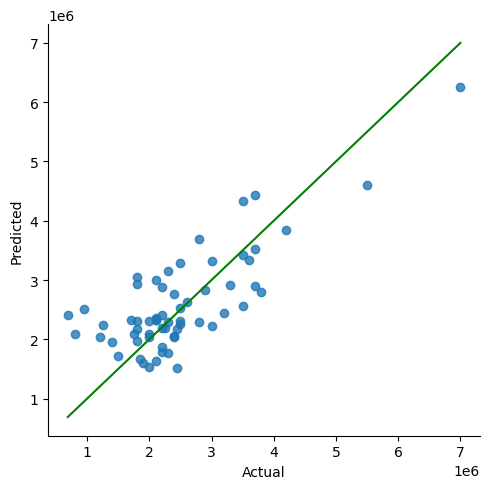

In [137]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Random forest Regressor

In [138]:
import sklearn
from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=100)

In [140]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((247, 10), (62, 10), (247,), (62,))

In [141]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [142]:
rfr.fit(x_train,y_train) 

RandomForestRegressor()

In [143]:
rfr_p=rfr.predict(x_test)

In [144]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.8006676681195002

In [145]:
rf_adr=1-(((1-rf_rsq)*(309-1))/(309-20-1))
rf_adr

0.7868251450722432

In [146]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

565233461466.129

In [147]:
rmse=pow(rfr_MSE,0.5)
rmse

751820.0991368408

In [148]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.8006676681195002

In [149]:
rf_adr=1-(((1-rf_rsq)*(309-1))/(309-19-1))
rf_adr

0.7875627743280487

In [150]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

565233461466.129

# Ada- Boost Regressor

In [151]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()

In [152]:
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [153]:
ad_p=ad.predict(x_test)

In [154]:
ad_rsq=ad.score(x_train,y_train)
ad_rsq

0.942081064231432

In [155]:
ad_adr=1-(((1-ad_rsq)*(309-1))/(309-11-1))
ad_adr

0.9399359184622258

In [156]:
ad_MSE=metrics.mean_squared_error(y_test,ad_p)
ad_MSE

561315175846.2927

In [157]:
rmse=pow(ad_MSE,0.5)
rmse

749209.7008490298

# XG Boost Regressor

In [158]:
import xgboost

In [159]:
from xgboost import  XGBRFRegressor
xgb=XGBRFRegressor()

In [160]:
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [161]:
xgb_p=xgb.predict(x_test)

In [162]:
xgb_rsq=xgb.score(x_train,y_train)
xgb_rsq

0.9414837764393965

In [163]:
xgb_adr=1-(((1-xgb_rsq)*(309-1))/(309-11-1))
xgb_adr

0.9393165089001149

In [164]:
xgb_mse=metrics.mean_squared_error(y_test,xgb_p)
xgb_mse

612622827965.5657

In [165]:
rmse=pow(xgb_mse,0.5)
rmse

782702.2600999473

In [166]:
list1=["LinearRegression","Random forest Regressor","Ada- Boost Regressor","XG Boost Regressor",]
list2=[R2,rf_rsq,ad_rsq,xgb_rsq]
list3=[Adj_R2,rf_adr,ad_adr,xgb_adr]
list4=[mse,rfr_MSE,ad_MSE,xgb_mse]

In [167]:
final_result=pd.DataFrame({"Model_Name":list1,"R-square":list2,"Adj_R2":list3,"MSE":list4})
final_result

,Model_Name,R-square,Adj_R2,MSE
0,LinearRegression,0.104242,0.042037,4.227252e+11
1,Random forest Regressor,0.800668,0.787563,5.652335e+11
2,Ada- Boost Regressor,0.942081,0.939936,5.613152e+11
3,XG Boost Regressor,0.941484,0.939317,6.126228e+11


### According to this RFE Random forest Regressoris best fitted to our data

# Conclusions 

### 1.We see that the price of the flats in Baramati is increasing year wise.

### 2.Sahyog Society and Vidyanagar has the maximum price and Mukti Nagar Kasba has the minimum price.

### 3.Most of the people expected range before buying a flat is 20 to 30 lakhs.

### 4.Most of the buildings in Baramati have 3 to 4 floors.

### 5.Peoples buy the flat according to a number of the family members.

### 6.In covid pandemic, there is a decrease in the buying of flat.

### 7.For the data, random forest regressor is the best fit.